%matplotlib inline magic command的作用是當你調用matplotlib.pyplot的繪圖函數plot()進行繪圖的時候，或者生成一個figure畫布的時候，可以直接在你的python console裏面生成圖像，
如果你是在spyder或VScode的話就不用加這行。

In [1]:
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [9]:
dataset = pd.read_csv('data.csv')

# Review dataset

In [10]:
dataset.head()

,Pretty Formula,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
0,B13C2,2.438648,-106.358032,-7.090535,112.056191,-0.072416,0.0089
1,SiB3,2.449974,-204.992906,-6.406028,328.145035,-0.040804,1.4083
2,SnB6,4.110240,-42.852113,-6.121730,74.164800,0.175492,0.7527
3,B6Pb,6.003820,-42.968600,-6.138371,75.248129,0.114862,0.9209
4,BN,3.302143,-68.876677,-8.609585,49.920018,-1.294085,4.7885


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pretty Formula             194 non-null    object 
 1   Density                    194 non-null    float64
 2   Energy                     194 non-null    float64
 3   Energy_per_Atom            194 non-null    float64
 4   Volume                     194 non-null    float64
 5   Formation_Energy_per_Atom  194 non-null    float64
 6   Band Gap                   194 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.7+ KB


In [15]:
dataset.isnull().sum()

Pretty Formula               0
Density                      0
Energy                       0
Energy_per_Atom              0
Volume                       0
Formation_Energy_per_Atom    0
Band Gap                     0
dtype: int64

- There are no missing values present in this dataset
- All the columns have numrical values, except "Pretty Formula".
- We have to do encoding for "Pretty Formula", in order to perform Linear Regression.

In [12]:
#dimension of the dataset
print(np.shape(dataset))
print(dataset.shape)

(194, 7)
(194, 7)


In [13]:
print(dataset.keys())
print(dataset.columns)

Index(['Pretty Formula', 'Density', 'Energy', 'Energy_per_Atom', 'Volume',
       'Formation_Energy_per_Atom', 'Band Gap'],
      dtype='object')
Index(['Pretty Formula', 'Density', 'Energy', 'Energy_per_Atom', 'Volume',
       'Formation_Energy_per_Atom', 'Band Gap'],
      dtype='object')


In [14]:
# summarized statistics of data
print(dataset.describe())

          Density      Energy  Energy_per_Atom       Volume  \
count  194.000000  194.000000       194.000000   194.000000   
mean     4.010071 -102.555176        -4.375345   617.596177   
std      1.840854  134.238964         1.496615   867.710688   
min      0.137583 -787.958416        -8.609585    27.982032   
25%      2.599889 -117.096298        -5.294537   147.235754   
50%      3.847741  -54.003392        -4.173707   334.977875   
75%      5.065528  -24.223280        -3.176430   720.484582   
max      9.897902   -4.026433        -1.342144  5834.917768   

       Formation_Energy_per_Atom    Band Gap  
count                 194.000000  194.000000  
mean                   -0.645980    1.964917  
std                     0.937101    1.539984  
min                    -3.889763    0.000100  
25%                    -1.118339    0.797150  
50%                    -0.440764    1.738550  
75%                    -0.071343    2.848425  
max                     1.883853    7.717300  


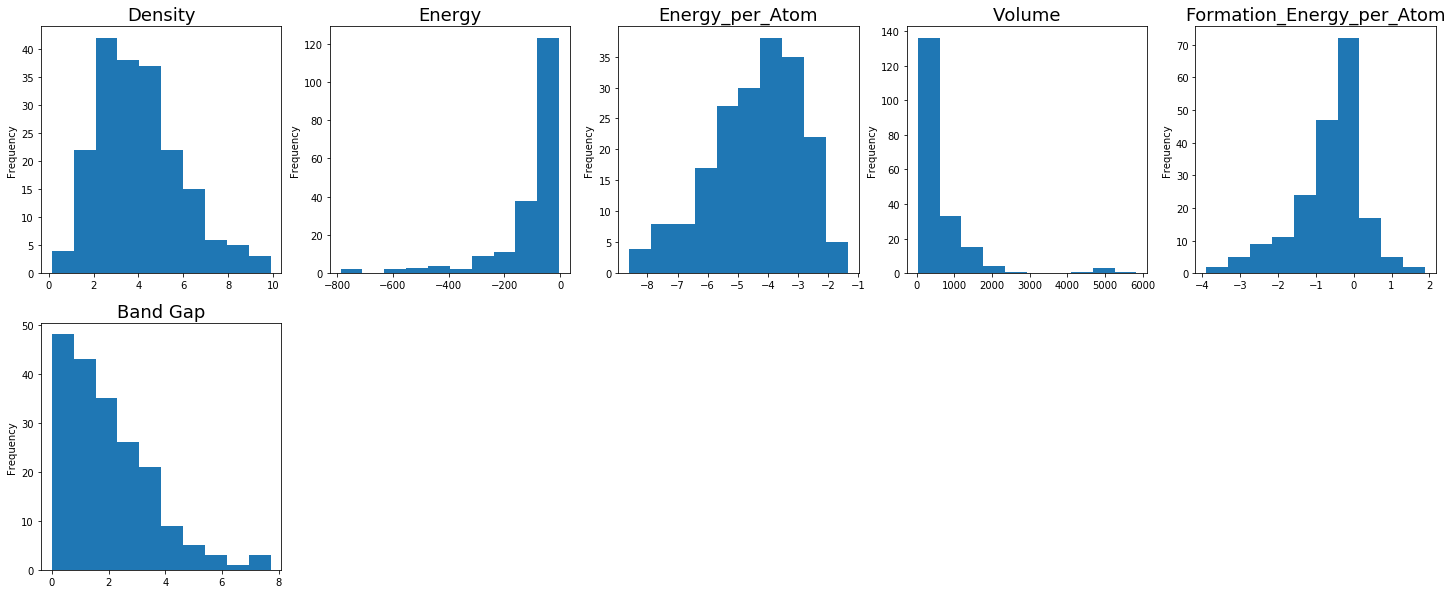

In [26]:
import math
import matplotlib.gridspec as gridspec

N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
feature=dataset[['Density', 'Energy', 'Energy_per_Atom', 'Volume', 'Formation_Energy_per_Atom','Band Gap']]
for item in feature.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

In [16]:
dataset.corr()

,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
Density,1.000000,0.199481,0.013873,-0.282227,0.073737,-0.378469
Energy,0.199481,1.000000,0.396104,-0.519135,0.250158,-0.104977
Energy_per_Atom,0.013873,0.396104,1.000000,0.216019,0.162678,-0.143674
Volume,-0.282227,-0.519135,0.216019,1.000000,0.035231,-0.013723
Formation_Energy_per_Atom,0.073737,0.250158,0.162678,0.035231,1.000000,-0.670781
Band Gap,-0.378469,-0.104977,-0.143674,-0.013723,-0.670781,1.000000


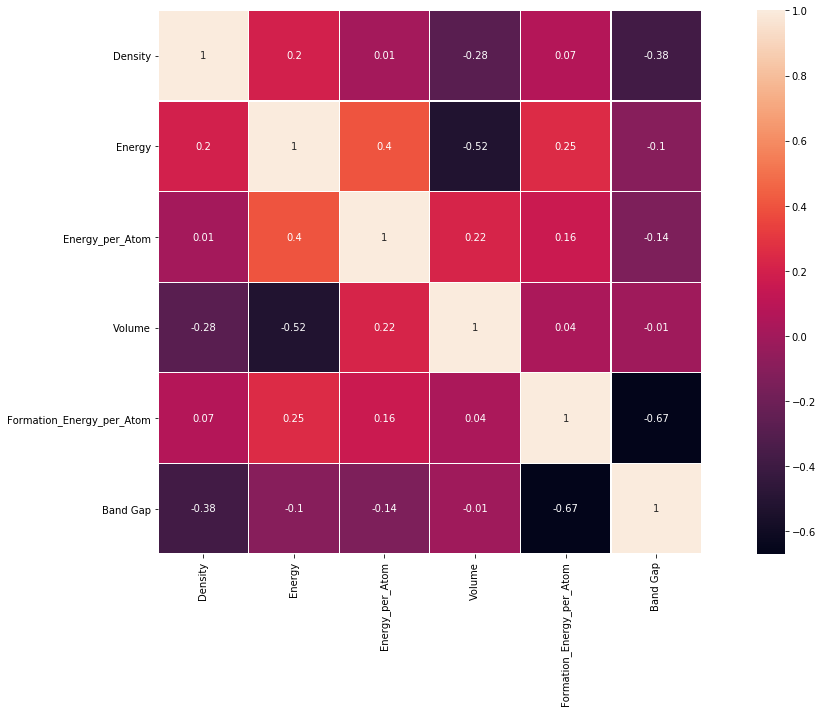

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr().round(2), annot=True, linewidths=0.2, square=True)

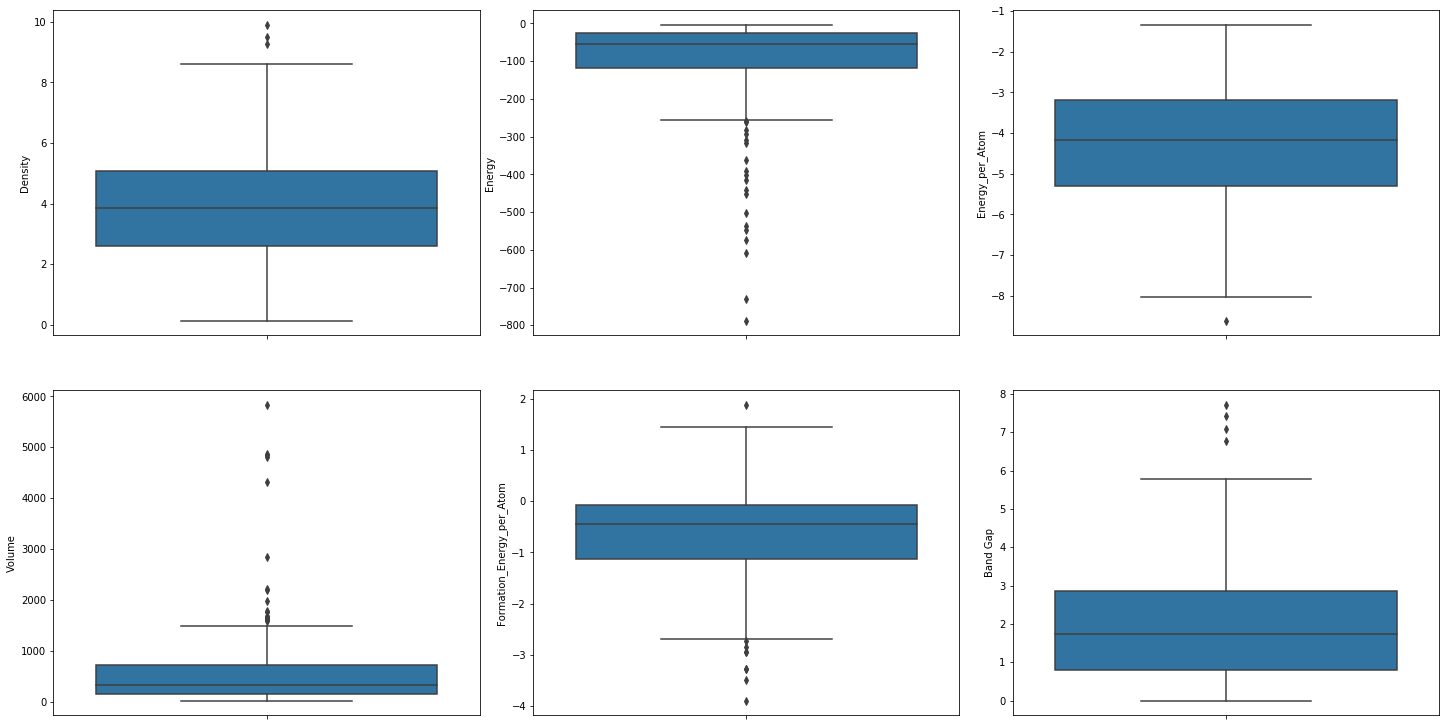

In [22]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset[['Density', 'Energy', 'Energy_per_Atom', 'Volume', 'Formation_Energy_per_Atom', 'Band Gap']].items():
    sns.boxplot(y=v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Choose 1 features to predict Band Gap
Here we choose 'Density' as 1 feature

In [24]:
df1 = dataset[['Density', 'Band Gap']]
df1.head()

,Density,Band Gap
0,2.438648,0.0089
1,2.449974,1.4083
2,4.110240,0.7527
3,6.003820,0.9209
4,3.302143,4.7885


# Splitting the dataset into the Training set and Test set
![holdout](https://cdn-images-1.medium.com/max/640/1*4G__SV580CxFj78o9yUXuQ.png)

# Split the data into training/testing sets manually

In [30]:
X_train = df1['Density'][:-39]
X_test  = df1['Density'][-39:]
print(X_train.shape, X_test.shape)

y_train = df1['Band Gap'][:-39]
y_test  = df1['Band Gap'][-39:]
print(y_train.shape, y_test.shape)

0      2.438648
1      2.449974
2      4.110240
3      6.003820
4      3.302143
         ...   
150    4.253170
151    4.339933
152    6.121655
153    4.026649
154    2.385375
Name: Density, Length: 155, dtype: float64 (39,)
(155,) (39,)


# Perform Linear Regression manually

$w_0=\bar y - w_1\bar x$

$w_1 = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}$

In [8]:
def leastsq_man(x,y):
    """
    x,y分别是要fitting數據中的自變量列表和應變量
    """
    meanx = sum(x) / len(x)   #求x的平均值
    meany = sum(y) / len(y)   #求y的平均值

    xsum = 0.0
    ysum = 0.0

    for i in range(len(x)):
        xsum += (x[i] - meanx)*(y[i]-meany)
        ysum += (x[i] - meanx)**2

    k = xsum/ysum
    b = meany - k*meanx

    return k,b   #傳回fitting的兩個參數值

In [10]:
k,b=leastsq_man(X_train,y_train)
print(k, b)

-0.32329485238406325 3.222885102139372


# Use scipy.optimize.leastsq
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html

In [34]:
#定義Regression的prototype function: Linear Regression
def func(p,x):
    k,b=p
    return k*x+b     #y=kx+b

#計算Residual
def error(p,x,y):
    return func(p,x)-y

In [35]:
from scipy.optimize import leastsq

#指定一組初始猜值
p0=(1,20)

#leastsq函數的引數，第一個要最小化的函數，第二個是可調參數初始的猜值，args是
#leastsq函數的傳回值是一個tuple，第一個元素是求解结果，第二個是求解的loss function
Para=leastsq(error,p0,args=(X_train,y_train))

k,b=Para[0]
print("k=",k,"b=",b)
print("cost：", Para[1])   #If it is equal to 1, 2, 3 or 4, the solution was found.

print("y="+str(round(k,2))+"x+"+str(round(b,2)))

k= -0.32329485212200576 b= 3.22288510038946
cost： 1
y=-0.32x+3.22


In [36]:
#density of MoS2 : 5.06 g/cm³
test = np.array([5.06])
y_pred=func(Para[0],test)
print("The caculated bandgap is: 1.8eV", )
print("The predictive bandgap is: ", y_pred)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [1.58701315]


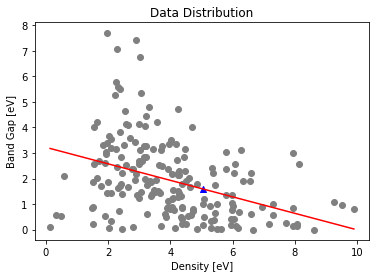

In [40]:
X_grid = np.arange(min(df1['Density']), max(df1['Density']), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(df1['Density'], df1['Band Gap'], color = 'gray')
plt.plot(X_grid, func(Para[0], X_grid), color="red")
plt.scatter(test, y_pred, marker='^', color='blue')
plt.title('Data Distribution')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.show()

# Scikit-Learning version

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['Density'], df1['Band Gap'], test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(155,) (39,)
(155,) (39,)


# Use Regression Model in Scikit-learn to fit the dataset

In [48]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = lr.predict(test.reshape(-1,1))
print("The caculated bandgap is: 1.8eV", )
print("The predictive bandgap is: ",y_pred)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [1.58122735]


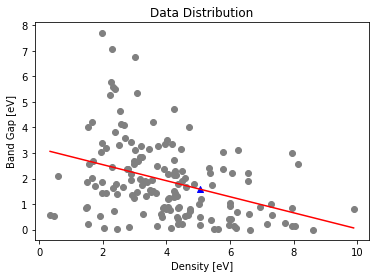

In [49]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, lr.predict(X_grid), color="red")
plt.scatter(test, y_pred, marker='^', color='blue')
plt.title('Data Distribution')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.show()

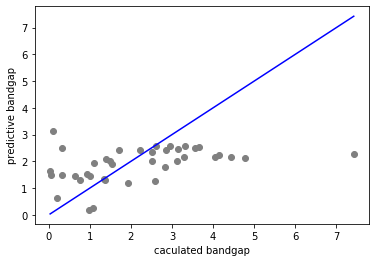

In [53]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, lr.predict(X_test.values.reshape(-1, 1)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()

# Visualising the Regression results for higher and smoother curve

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0 )
regressor.fit(X_train.values.reshape(-1, 1), y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [0.390599]


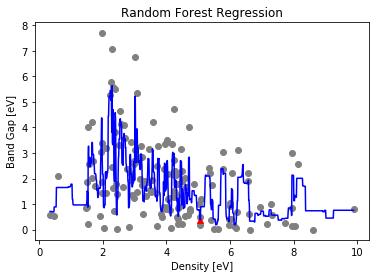

In [51]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
#density of MoS2 : 5.06 g/cm³
test = np.array([5.06])
test = test.reshape(len(test), 1)
print("The caculated bandgap is: 1.8eV", )
y_pred=regressor.predict(test)
print("The predictive bandgap is: ",y_pred)
plt.scatter(test, y_pred, marker='^', color='red')
plt.show()

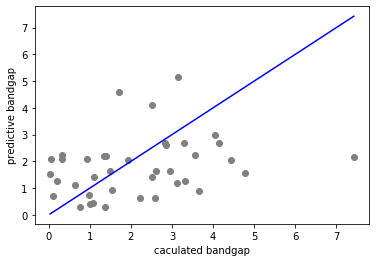

In [52]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, regressor.predict(X_test.values.reshape(-1, 1)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()

# 課堂練習

In [18]:
lasso = linear_model.Lasso()

In [19]:
rr = linear_model.Ridge()

In [54]:
from sklearn.neural_network import MLPRegressor
mlpr =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlpr.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = mlpr.predict(test)
print("The caculated bandgap is: 1.8eV", )
print("The predictive bandgap is: ",y_pred)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [1.52531112]


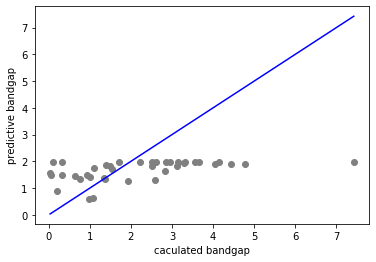

In [55]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, mlpr.predict(X_test.values.reshape(-1, 1)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()

# Choose 2 features to predict Band Gap
Here we choose 'Density' and 'Formation_Energy_per_Atom' as the 2 features

In [56]:
df2 = dataset[['Density', 'Formation_Energy_per_Atom', 'Band Gap']]
df2.head()

,Density,Formation_Energy_per_Atom,Band Gap
0,2.438648,-0.072416,0.0089
1,2.449974,-0.040804,1.4083
2,4.110240,0.175492,0.7527
3,6.003820,0.114862,0.9209
4,3.302143,-1.294085,4.7885


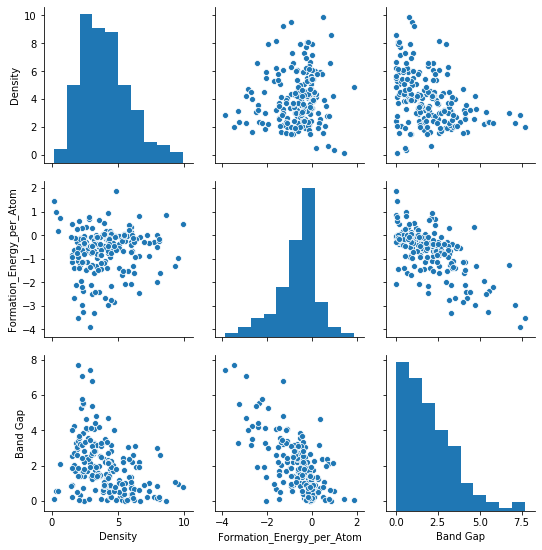

In [57]:
sns.pairplot(data=df2)

Observations:
- 'Density' and 'Formation_Energy_per_Atom' are normally distributed.
- 'Band Gap' shows quite a negatively skewed(left-skewed) graph
- No strong Linear correlation is present between 'Density' , 'Formation_Energy_per_Atom' and 'Band Gap'.

In [58]:
for k, v in df2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Density outliers = 1.55%
Column Formation_Energy_per_Atom outliers = 4.64%
Column Band Gap outliers = 2.06%


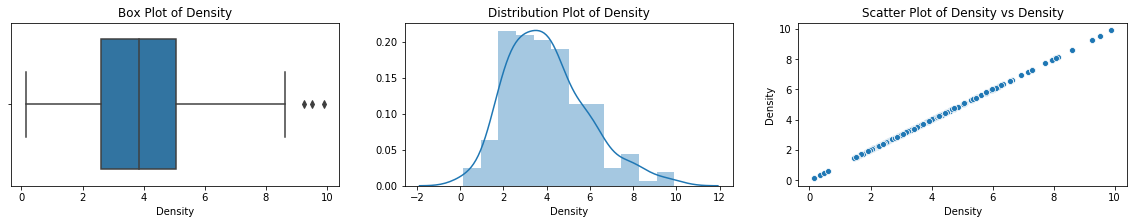

In [62]:
#Box Plot, Distribution Plot and Scatter Plot for Dependent variable Density
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
sns.boxplot(df2.Density)
plt.title('Box Plot of Density')

plt.subplot(1,3,2)
sns.distplot(a=df2.Density)
plt.title('Distribution Plot of Density')

plt.subplot(1,3,3)
sns.scatterplot(df2.Density,df2.Density)
plt.title('Scatter Plot of Density vs Density')
plt.show()

## REMOVING OUTLIERS

In [65]:
temp_df1 = df2[~(df2['Density']>8.0)]
temp_df1

print(f'The maximum values of the dataset are:\n{temp_df1.max()}')
print(f'Shape of dataset before removing Outliers: {df2.shape}')
print(f'Shape of dataset after removing Outliers: {temp_df1.shape}')

The maximum values of the dataset are:
Density                      7.953395
Formation_Energy_per_Atom    1.883853
Band Gap                     7.717300
dtype: float64
Shape of dataset before removing Outliers: (194, 3)
Shape of dataset after removing Outliers: (187, 3)


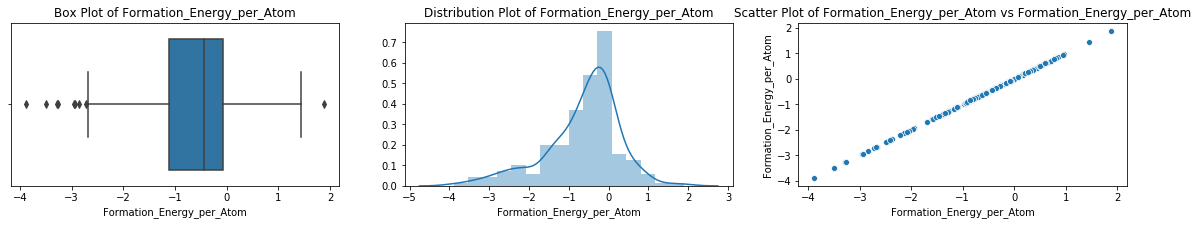

In [66]:
#Box Plot, Distribution Plot and Scatter Plot for Dependent variable Formation_Energy_per_Atom
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
sns.boxplot(df2.Formation_Energy_per_Atom)
plt.title('Box Plot of Formation_Energy_per_Atom')

plt.subplot(1,3,2)
sns.distplot(a=df2.Formation_Energy_per_Atom)
plt.title('Distribution Plot of Formation_Energy_per_Atom')

plt.subplot(1,3,3)
sns.scatterplot(df2.Formation_Energy_per_Atom,df2.Formation_Energy_per_Atom)
plt.title('Scatter Plot of Formation_Energy_per_Atom vs Formation_Energy_per_Atom')
plt.show()

In [67]:
temp_df2 = temp_df1[~(df2['Formation_Energy_per_Atom']<-3.0)]
temp_df2

print(f'The maximum values of the dataset are:\n{temp_df2.max()}')
print(f'Shape of dataset before removing Outliers: {df2.shape}')
print(f'Shape of dataset after removing Outliers: {temp_df2.shape}')

The maximum values of the dataset are:
Density                      7.953395
Formation_Energy_per_Atom    1.883853
Band Gap                     7.088100
dtype: float64
Shape of dataset before removing Outliers: (194, 3)
Shape of dataset after removing Outliers: (183, 3)
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [70]:
X_train, X_test, y_train, y_test = train_test_split(temp_df2[['Density', 'Formation_Energy_per_Atom']], temp_df2['Band Gap'], test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(146, 2) (37, 2)
(146,) (37,)


In [73]:
# GaN,4.143879539961921,-547.8152866,-5.478152866,1677.6119372761211,0.013417552810000188,0.07529999999999992

lr = linear_model.LinearRegression()

lr.fit(X_train.values.reshape(-1,2), y_train)

test = np.array([[5.06],[0.013]])
y_pred = lr.predict(test.reshape(-1,2))
print("The caculated bandgap is: 0.0752eV", )
print("The predictive bandgap is: ",y_pred)

The caculated bandgap is: 0.0752eV
The predictive bandgap is:  [0.85161374]


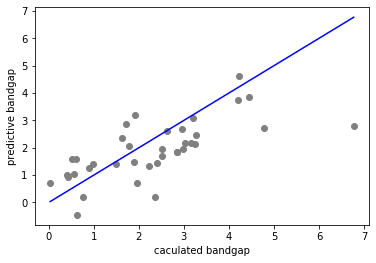

In [74]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, lr.predict(X_test.values.reshape(-1, 2)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()